<a href="https://colab.research.google.com/github/Suraj722004/Project_sem1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import random
from PIL import Image, ImageDraw
import yaml
import shutil

DATA_DIR = "/content/garbage_yolo"
if os.path.exists(DATA_DIR):
    shutil.rmtree(DATA_DIR)

os.makedirs(f"{DATA_DIR}/images/train", exist_ok=True)
os.makedirs(f"{DATA_DIR}/images/val", exist_ok=True)
os.makedirs(f"{DATA_DIR}/labels/train", exist_ok=True)
os.makedirs(f"{DATA_DIR}/labels/val", exist_ok=True)

IMG_SIZE = 640
N_TRAIN = 200
N_VAL = 40

def generate_garbage_image(filename, label_path):
    img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (220, 220, 220))
    draw = ImageDraw.Draw(img)

    # Random garbage blob
    x1 = random.randint(100, 400)
    y1 = random.randint(100, 400)
    size = random.randint(80, 150)
    x2 = x1 + size
    y2 = y1 + size
    draw.ellipse((x1, y1, x2, y2), fill=(120, 60, 60))

    # Normalize YOLO bbox
    xc = (x1 + x2) / 2 / IMG_SIZE
    yc = (y1 + y2) / 2 / IMG_SIZE
    w = (x2 - x1) / IMG_SIZE
    h = (y2 - y1) / IMG_SIZE

    with open(label_path, "w") as f:
        f.write(f"0 {xc} {yc} {w} {h}")

    img.save(filename)

def generate_clean_image(filename, label_path):
    img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (200, 230, 255))
    img.save(filename)
    open(label_path, "w").close()  # no garbage (no label)

for i in range(N_TRAIN):
    if random.random() > 0.5:
        generate_garbage_image(f"{DATA_DIR}/images/train/img_{i}.jpg",
                               f"{DATA_DIR}/labels/train/img_{i}.txt")
    else:
        generate_clean_image(f"{DATA_DIR}/images/train/img_{i}.jpg",
                             f"{DATA_DIR}/labels/train/img_{i}.txt")

for i in range(N_VAL):
    if random.random() > 0.5:
        generate_garbage_image(f"{DATA_DIR}/images/val/img_{i}.jpg",
                               f"{DATA_DIR}/labels/val/img_{i}.txt")
    else:
        generate_clean_image(f"{DATA_DIR}/images/val/img_{i}.jpg",
                             f"{DATA_DIR}/labels/val/img_{i}.txt")

# Create YOLO data.yaml
data_yaml = {
    "path": DATA_DIR,
    "train": "images/train",
    "val": "images/val",
    "names": {0: "garbage"}
}

with open(f"{DATA_DIR}/data.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("YOLO dataset ready!")



YOLO dataset ready!


In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")    # smallest model for speed (can use yolov8s.pt, yolov8m.pt etc.)

model.train(
    data="/content/garbage_yolo/data.yaml",
    epochs=10,        # increase for better accuracy
    imgsz=640,
    batch=8
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/garbage_yolo/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e294a6406b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")    # smallest model for speed (can use yolov8s.pt, yolov8m.pt etc.)

model.train(
    data="/content/garbage_yolo/data.yaml",
    epochs=10,        # increase for better accuracy
    imgsz=640,
    batch=8
)


Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/garbage_yolo/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e2946f10b60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/garbage_yolo/images/val/img_0.jpg: 640x640 (no detections), 199.3ms
Speed: 2.7ms preprocess, 199.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


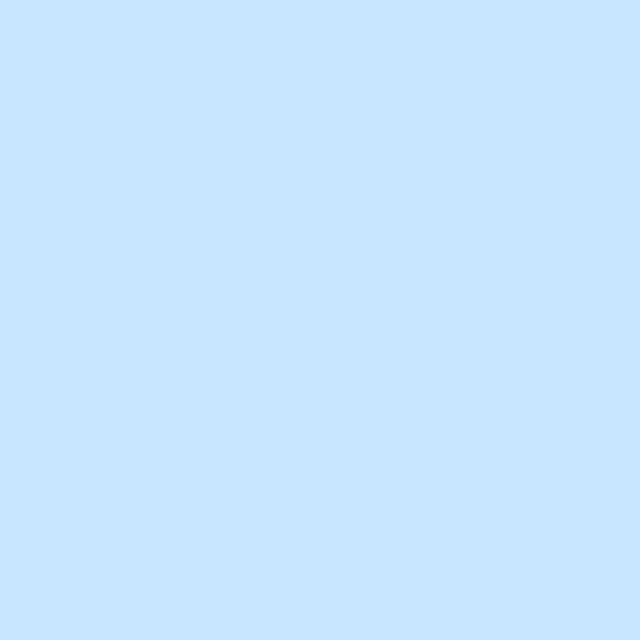

In [9]:
from ultralytics import YOLO
from IPython.display import display
from PIL import Image

model = YOLO("/content/runs/detect/train/weights/best.pt")

# Predict on your generated validation image
img_path = "/content/garbage_yolo/images/val/img_0.jpg"
results = model(img_path)

results[0].show()    # show bounding box result
